In [28]:
#Adaboost from scratch

In [29]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [30]:
df = pd.DataFrame()

In [31]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot:xlabel='X1', ylabel='X2'>

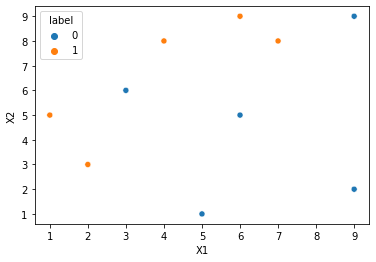

In [32]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'], hue= df['label'])

In [33]:
df['weights'] = 1/df.shape[0]
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [34]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth=1)

In [35]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [36]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

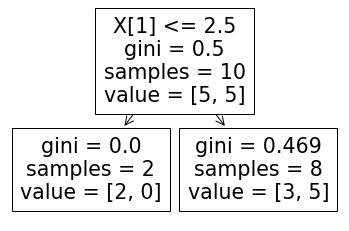

In [37]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<AxesSubplot:>

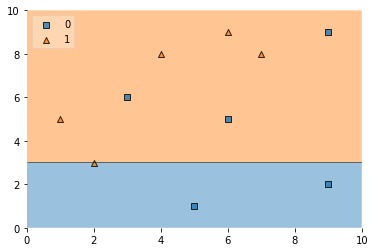

In [38]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [39]:
df['y_pred'] = dt1.predict(X)
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [40]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [41]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [42]:
def update_row_weights(row, alpha= alpha1):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)    

In [43]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,1,0.152753
3,4,8,1,0.1,1,0.065465
4,5,1,0,0.1,0,0.065465
5,6,9,1,0.1,1,0.065465
6,6,5,0,0.1,1,0.152753
7,7,8,1,0.1,1,0.065465
8,9,9,0,0.1,1,0.152753
9,9,2,0,0.1,0,0.065465


In [44]:
df['updated_weights'].sum()

0.9165151389911682

In [45]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,1,0.152753,0.166667
3,4,8,1,0.1,1,0.065465,0.071429
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,1,0.065465,0.071429
6,6,5,0,0.1,1,0.152753,0.166667
7,7,8,1,0.1,1,0.065465,0.071429
8,9,9,0,0.1,1,0.152753,0.166667
9,9,2,0,0.1,0,0.065465,0.071429


In [46]:
df['normalized_weights'].sum()

0.9999999999999999

In [49]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper']-df['normalized_weights']

In [51]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065465,0.000000,0.071429
1,2,3,1,0.1,1,0.065465,0.071429,0.142857
2,3,6,0,0.1,1,0.152753,0.142857,0.309524
3,4,8,1,0.1,1,0.065465,0.309524,0.380952
4,5,1,0,0.1,0,0.065465,0.380952,0.452381
5,6,9,1,0.1,1,0.065465,0.452381,0.523810
6,6,5,0,0.1,1,0.152753,0.523810,0.690476
7,7,8,1,0.1,1,0.065465,0.690476,0.761905
8,9,9,0,0.1,1,0.152753,0.761905,0.928571
9,9,2,0,0.1,0,0.065465,0.928571,1.000000


In [53]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and row['cumsum_lower'] < a:
                indices.append(index)
    return indices            

In [57]:
index_values = create_new_dataset(df)
index_values

[6, 6, 3, 2, 2, 4, 9, 8, 3, 5]

In [58]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
6,6,5,0,0.1
6,6,5,0,0.1
3,4,8,1,0.1
2,3,6,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
9,9,2,0,0.1
8,9,9,0,0.1
3,4,8,1,0.1
5,6,9,1,0.1


[Text(0.5, 0.75, 'X[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]')]

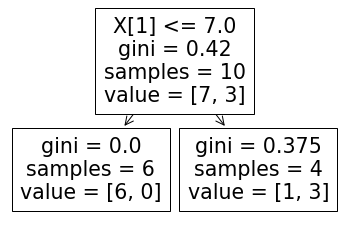

In [61]:

dt2 = DecisionTreeClassifier(max_depth=1)
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
dt2.fit(X,y)
plot_tree(dt2)


<AxesSubplot:>

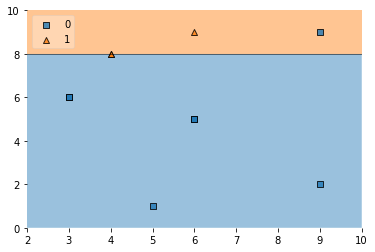

In [60]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [62]:
second_df['y_pred'] = dt2.predict(X)
second_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,0
6,6,5,0,0.1,0
3,4,8,1,0.1,1
2,3,6,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0
9,9,2,0,0.1,0
8,9,9,0,0.1,1
3,4,8,1,0.1,1
5,6,9,1,0.1,1


In [63]:

alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [64]:

# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

    

In [65]:

second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [66]:

second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
6,6,5,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,1,0.297427,0.495694
3,4,8,1,0.1,1,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034


In [67]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
6,6,5,0,0.1,0,0.056034,0.000000,0.056034
6,6,5,0,0.1,0,0.056034,0.056034,0.112068
3,4,8,1,0.1,1,0.056034,0.112068,0.168102
2,3,6,0,0.1,0,0.056034,0.168102,0.224136
2,3,6,0,0.1,0,0.056034,0.224136,0.280170
4,5,1,0,0.1,0,0.056034,0.280170,0.336204
9,9,2,0,0.1,0,0.056034,0.336204,0.392238
8,9,9,0,0.1,1,0.495694,0.392238,0.887932
3,4,8,1,0.1,1,0.056034,0.887932,0.943966
5,6,9,1,0.1,1,0.056034,0.943966,1.000000


In [68]:

index_values = create_new_dataset(second_df)
third_df = second_df.iloc[index_values,[0,1,2,3]]

third_df

,X1,X2,label,weights
9,9,2,0,0.1
3,4,8,1,0.1
9,9,2,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
9,9,2,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1


<AxesSubplot:>

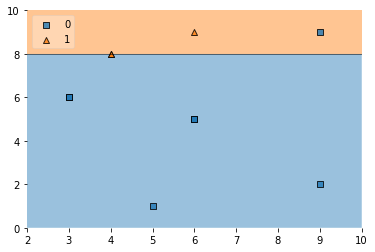

In [69]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)


plot_decision_regions(X, y, clf=dt3, legend=2)

In [70]:

third_df['y_pred'] = dt3.predict(X)

third_df
alpha3 = calculate_model_weight(0.7)
alpha3
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


In [71]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)
dt2.predict(query)
dt3.predict(query)


alpha1*1 + alpha2*(1) + alpha3*(1)

np.sign(1.09)

query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

dt2.predict(query)

dt3.predict(query)

alpha1*(1) + alpha2*(-1) + alpha3*(-1)

np.sign(-0.25)

-1.0